In [179]:
___Author___='LumberJack Jyss'

In [180]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers.recurrent import LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set(palette='bright',style='whitegrid')
import numpy as np
import pandas as pd
import quandl
import pandas_datareader as web
from statsmodels.tsa.stattools import coint
import statsmodels
from statsmodels.tsa.stattools import adfuller
import itertools
import scipy
from scipy import stats
import time
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

In [181]:
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-19')

In [182]:
data = web.DataReader('AMZN','yahoo',start,end)
spy_etf = web.DataReader('SPY','yahoo',start,end)
data = data.drop(['High','Low','Close'],axis=1)
data.columns=['Volume','Open','Adj Close']
data.tail()

,Volume,Open,Adj Close
Date,,,
2019-03-13,1683.000000,3552000,1690.810059
2019-03-14,1691.199951,2946600,1686.219971
2019-03-15,1703.000000,7550900,1712.359985
2019-03-18,1712.699951,5429100,1742.150024
2019-03-19,1753.510010,6364200,1761.849976


In [183]:
spy_etf = spy_etf.drop(['High','Low','Close'],axis=1)
spy_etf.columns = ['Volume','Open','Adj Close']
spy_etf.head()

,Volume,Open,Adj Close
Date,,,
2016-03-31,205.910004,94584100.0,193.828278
2016-04-01,204.350006,114423500.0,195.148621
2016-04-04,206.830002,63497000.0,194.516769
2016-04-05,204.669998,99662200.0,192.573914
2016-04-06,204.190002,89889800.0,194.677063


In [184]:
spy_etf.isnull().sum().sum()

0

In [185]:
len(spy_etf)

747

In [186]:
data.isnull().sum().sum()

0

In [187]:
len(data)

747

In [188]:
dataset = pd.DataFrame()
dataset = pd.concat([data,spy_etf],axis=1)
dataset.columns = ['Volume_SPY','Open_SPY','Adj Close_SPY','Volume_AMZN','Open_AMZN','Adj Close_AMZN']
dataset['Adj Close_AMZN'] = data['Adj Close'].shift(-1)
dataset.tail()

,Volume_SPY,Open_SPY,Adj Close_SPY,Volume_AMZN,Open_AMZN,Adj Close_AMZN
Date,,,,,,
2019-03-13,1683.000000,3552000,1690.810059,280.480011,80639200.0,1686.219971
2019-03-14,1691.199951,2946600,1686.219971,281.369995,67518400.0,1712.359985
2019-03-15,1703.000000,7550900,1712.359985,280.540009,81309000.0,1742.150024
2019-03-18,1712.699951,5429100,1742.150024,281.549988,62199800.0,1761.849976
2019-03-19,1753.510010,6364200,1761.849976,283.510010,90268100.0,NaN


In [189]:
dataset.isnull().sum().sum()

1

In [190]:
dataset = dataset.iloc[0:-1,:]
dataset.tail()

,Volume_SPY,Open_SPY,Adj Close_SPY,Volume_AMZN,Open_AMZN,Adj Close_AMZN
Date,,,,,,
2019-03-12,1669.000000,3614500,1673.099976,279.059998,79667500.0,1690.810059
2019-03-13,1683.000000,3552000,1690.810059,280.480011,80639200.0,1686.219971
2019-03-14,1691.199951,2946600,1686.219971,281.369995,67518400.0,1712.359985
2019-03-15,1703.000000,7550900,1712.359985,280.540009,81309000.0,1742.150024
2019-03-18,1712.699951,5429100,1742.150024,281.549988,62199800.0,1761.849976


In [191]:
dataset.isnull().sum().sum()

0

In [192]:
X = dataset.iloc[ : , : 5]#.to_frame()#.dropna()
y = dataset.iloc[ : , 5].to_frame()#.dropna()

In [193]:
X.head()

,Volume_SPY,Open_SPY,Adj Close_SPY,Volume_AMZN,Open_AMZN
Date,,,,,
2016-03-31,599.280029,2681800,593.640015,205.910004,94584100.0
2016-04-01,590.489990,2917400,598.500000,204.350006,114423500.0
2016-04-04,599.000000,2470800,593.190002,206.830002,63497000.0
2016-04-05,590.770020,2308900,586.140015,204.669998,99662200.0
2016-04-06,587.520020,2833500,602.080017,204.190002,89889800.0


In [194]:
y.head()

,Adj Close_AMZN
Date,
2016-03-31,598.500000
2016-04-01,593.190002
2016-04-04,586.140015
2016-04-05,602.080017
2016-04-06,591.429993


Text(0.5, 1.0, 'Adj Close of SPY (Training Data)')

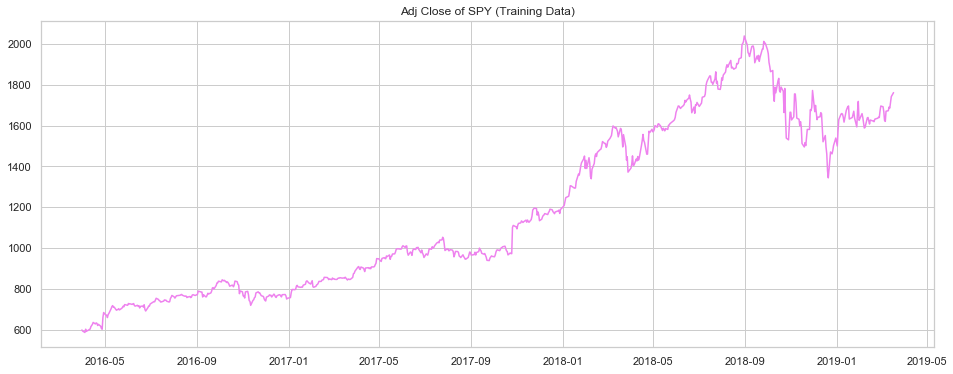

In [195]:
plt.figure(figsize = (16, 6))
plt.plot(y, color = 'violet')
plt.title('Adj Close of SPY (Training Data)')

In [196]:
print ('\nInfos X : \n')
print (X.info(),'\n')


Infos X : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2016-03-31 to 2019-03-18
Data columns (total 5 columns):
Volume_SPY       746 non-null float64
Open_SPY         746 non-null int64
Adj Close_SPY    746 non-null float64
Volume_AMZN      746 non-null float64
Open_AMZN        746 non-null float64
dtypes: float64(4), int64(1)
memory usage: 35.0 KB
None 



In [197]:
print ('\nInfos y : \n')
print(y.info(),'\n')


Infos y : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2016-03-31 to 2019-03-18
Data columns (total 1 columns):
Adj Close_AMZN    746 non-null float64
dtypes: float64(1)
memory usage: 11.7 KB
None 



In [198]:
n = X.shape[0]
p = y.shape[0]
print('La valeur de n (shape de X) est de : ',n)
print('La valeur de p (shape de y) est de : ',p)

La valeur de n (shape de X) est de :  746
La valeur de p (shape de y) est de :  746


In [199]:
X = X.values
y = y.values

In [200]:
X.shape

(746, 5)

In [201]:
y.shape

(746, 1)

In [202]:
# Split the train_test model in 80%_20%
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
X_train = X[np.arange(train_start, train_end), :]
X_test = X[np.arange(test_start, test_end), :]
y_train = y[np.arange(train_start, train_end), :]
y_test = y[np.arange(test_start, test_end), :]

In [150]:
# Scale data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [151]:
# Initialize the graph
graph = tf.Session()

In [152]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, 5]) # correspond au shape de X 
Y = tf.placeholder(dtype=tf.float32, shape=[None,1]) # correspond au shape de y

In [153]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [169]:
# Model architecture parameters
n_stocks = 5 # Nb of columns
n_neurons_1 = 100
n_neurons_2 = 100
n_neurons_3 = 100
n_neurons_4 = 100
n_neurons_5 = 100
n_target = 1

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))
# Layer 4: Variables for hidden weights and biases
W_hidden_5 = tf.Variable(weight_initializer([n_neurons_4, n_neurons_5]))
bias_hidden_5 = tf.Variable(bias_initializer([n_neurons_5]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_5, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [170]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
hidden_5 = tf.nn.relu(tf.add(tf.matmul(hidden_4, W_hidden_5), bias_hidden_5))


# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_5, W_out), bias_out))

In [171]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [172]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

No handles with labels found to put in legend.


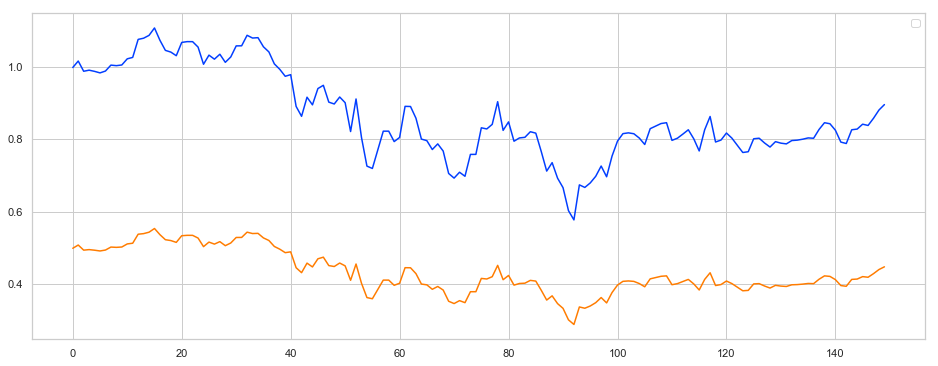

In [173]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.legend()
plt.show()

# Number of epochs and batch size
epochs = 1
batch_size = 1000

for e in range(epochs):

    # Shuffle training data
    #shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    #X_train = X_train[shuffle_indices]
    #y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)


In [174]:
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final*100,'%')

85.08773446083069 %


In [211]:
y_tot = np.concatenate((y_train, y_test))

In [212]:
len(y_tot)

746

In [213]:
dataset['Predictions'] = y_tot

In [214]:
dataset.tail(155)

,Volume_SPY,Open_SPY,Adj Close_SPY,Volume_AMZN,Open_AMZN,Adj Close_AMZN,Predictions
Date,,,,,,,
2018-08-03,1837.739990,3460500,1823.290039,282.529999,53935400.0,1847.750000,1847.750000
2018-08-06,1825.810059,3391800,1847.750000,283.640015,39400900.0,1862.479980,1862.479980
2018-08-07,1854.530029,3377500,1862.479980,285.390015,43196600.0,1886.520020,1886.520020
2018-08-08,1861.000000,3963000,1886.520020,285.390015,42114600.0,1898.520020,1898.520020
2018-08-09,1882.000000,4849900,1898.520020,285.529999,35652400.0,1886.300049,1886.300049
2018-08-10,1888.510010,3639900,1886.300049,283.450012,77076000.0,1896.199951,1896.199951
2018-08-13,1898.500000,5512600,1896.199951,283.470001,65686900.0,1919.650024,1919.650024
2018-08-14,1919.390015,3986100,1919.650024,282.920013,43842000.0,1882.619995,1882.619995
2018-08-15,1909.550049,7700700,1882.619995,282.380005,102925400.0,1886.520020,1886.520020


In [218]:
dataset['Err'] = (dataset['Predictions'] - dataset['Adj Close_AMZN'])*100
dataset.tail()

,Volume_SPY,Open_SPY,Adj Close_SPY,Volume_AMZN,Open_AMZN,Adj Close_AMZN,Predictions,Err
Date,,,,,,,,
2019-03-12,1669.000000,3614500,1673.099976,279.059998,79667500.0,1690.810059,1690.810059,0.0
2019-03-13,1683.000000,3552000,1690.810059,280.480011,80639200.0,1686.219971,1686.219971,0.0
2019-03-14,1691.199951,2946600,1686.219971,281.369995,67518400.0,1712.359985,1712.359985,0.0
2019-03-15,1703.000000,7550900,1712.359985,280.540009,81309000.0,1742.150024,1742.150024,0.0
2019-03-18,1712.699951,5429100,1742.150024,281.549988,62199800.0,1761.849976,1761.849976,0.0
